In [31]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [32]:
data_path = 'C:/Medical Classification Model/sdc/train' 

# LOAD DATA

In [33]:
#dermnet = del data_path['Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions']
#data = data_path.drop('Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions')

In [34]:
train_data = []
val_data = []

for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    file = os.listdir(folder_path)
    num_train = int(0.8 * len(file))
    files_train = random.sample(file, num_train)
    files_val = list(set(file) - set(files_train))
    
    for file in files_train:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        train_data.append((img, folder))
        
    for file in files_val:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        val_data.append((img, folder))

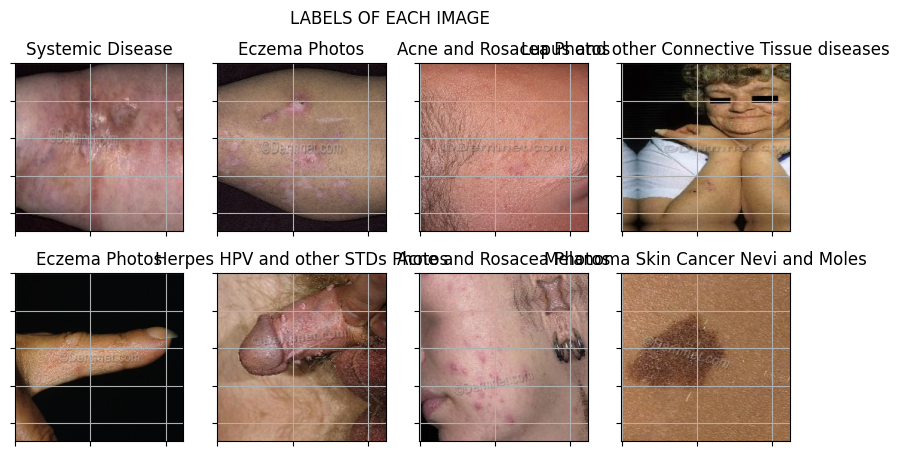

In [35]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
plt.suptitle('LABELS OF EACH IMAGE')

for (img, label), ax in zip(random.sample(train_data, 8), axes.flatten()):
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.grid(True)
    ax.set_title(label)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )

plt.show()

# PREPARE MODEL

In [36]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)


In [37]:
base_model.trainable = False

In [38]:
num_classes = 20
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [39]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# PREPROCESS DATA

In [40]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# train_data = [(preprocess_input(input), label) for input, label in train_data]
# val_data = [(preprocess_input(input), label) for input, label in val_data]

X_train, y_train = zip(*train_data)
X_val, y_val = zip(*val_data)

X_train = preprocess_input(np.array(X_train))
X_val = preprocess_input(np.array(X_val))

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes)

MemoryError: Unable to allocate 9.42 GiB for an array with shape (16800, 224, 224, 3) and data type float32

# TRAIN

In [ ]:
EPOCHS = 12
BATCH_SIZE = 32
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot),
                   epochs = EPOCHS, batch_size=BATCH_SIZE)

model.save('/kaggle/working/my_model.h5')

Epoch 1/12
389/389 [==============================] - 63s 146ms/step - loss: 2.4513 - accuracy: 0.2881 - val_loss: 2.1951 - val_accuracy: 0.3325
Epoch 2/12
389/389 [==============================] - 58s 150ms/step - loss: 2.0168 - accuracy: 0.3971 - val_loss: 2.0865 - val_accuracy: 0.3758
Epoch 3/12
389/389 [==============================] - 57s 148ms/step - loss: 1.7719 - accuracy: 0.4601 - val_loss: 2.0485 - val_accuracy: 0.3985
Epoch 4/12
389/389 [==============================] - 59s 152ms/step - loss: 1.5784 - accuracy: 0.5133 - val_loss: 2.0113 - val_accuracy: 0.4277
Epoch 5/12
389/389 [==============================] - 58s 150ms/step - loss: 1.3791 - accuracy: 0.5774 - val_loss: 2.0060 - val_accuracy: 0.4322
Epoch 6/12
389/389 [==============================] - 58s 149ms/step - loss: 1.2063 - accuracy: 0.6255 - val_loss: 2.0310 - val_accuracy: 0.4341
Epoch 7/12
389/389 [==============================] - 58s 150ms/step - loss: 1.0393 - accuracy: 0.6708 - val_loss: 2.0359 - val_ac

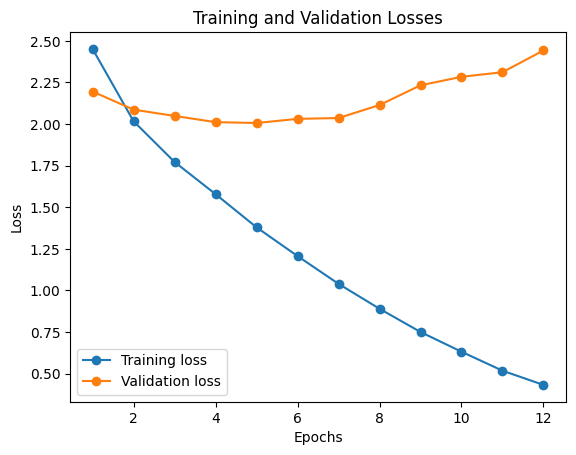

In [ ]:
# Get the training and validation losses from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array representing the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation losses
plt.plot(epochs, train_loss,label='Training loss', marker='o')
plt.plot(epochs, val_loss,label='Validation loss', marker='o')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

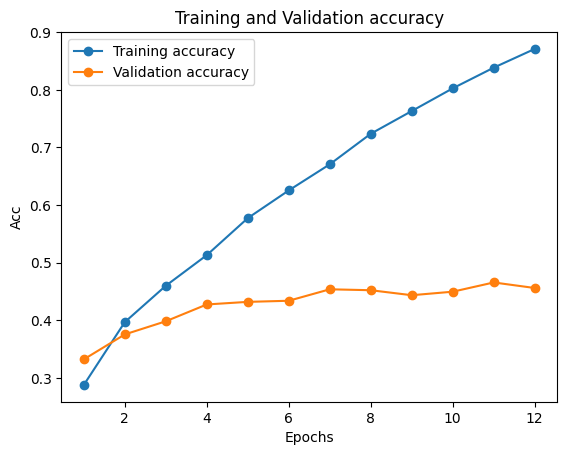

In [ ]:
# Get the training and validation losses from the history object
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

# Create an array representing the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation losses
plt.plot(epochs, train_loss,label='Training accuracy', marker='o')
plt.plot(epochs, val_loss,label='Validation accuracy', marker='o')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

# Show the plot
plt.show()

# PREDICT

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
test_path = '/kaggle/input/dermnet/test'

In [ ]:
model = load_model('/kaggle/working/my_model.h5') 

In [ ]:
real_label = []
predicted_class = []

for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        img = preprocess_input(np.array([img]))  # Add an extra dimension for batching

        predictions = model.predict(img)
        real_label.append(folder)
        predicted_class_index = np.argmax(predictions)
        predicted_class.append(le.classes_[predicted_class_index])


1/1 [==============================] - 0s 20ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(real_label, predicted_class)

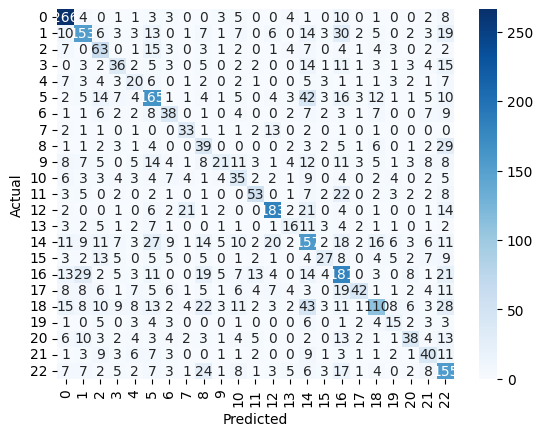

In [ ]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate overall accuracy
accuracy = accuracy_score(real_label, predicted_class)

report = classification_report(
    real_label, 
    predicted_class, 
    target_names=le.classes_,  # Use the same class names as in your LabelEncoder
    digits=2
)
print(f"Overall Test Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report (Test Set):\n", report)

Overall Test Accuracy: 47.13%

Classification Report (Test Set):
                                                                     precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.69      0.85      0.77       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.58      0.53      0.55       288
                                          Atopic Dermatitis Photos       0.37      0.51      0.43       123
                                            Bullous Disease Photos       0.36      0.32      0.34       113
                Cellulitis Impetigo and other Bacterial Infections       0.25      0.27      0.26        73
                                                     Eczema Photos       0.49      0.53      0.51       309
                                      Exanthems and Drug Eruptions       0.39      0.38      0.38       101
                 Hair Loss Photos Alopecia and other Hair Diseases   